<h1 style = "font-size:50px; color: #9DC719;">Rental Bike Prediction</h1>

<html>
<p style="border:3px solid black;color:green;background-color:mint;padding:10px;">
    <b style="color:Black;">Data Set Information:</b><br><br>
    Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort.
It is important to make the rental bike available and accessible to the public at the right time as 
it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes 
a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply 
of rental bikes.
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), 
the number of bikes rented per hour and date information.<br><br>
    <b style="color:Black;">Attribute Information:</b><br><br>
    🔶 Date : year-month-day<br>
🔶 Rented Bike count - Count of bikes rented at each hour<br>
🔶 Hour - Hour of he day<br>
🔶 Temperature-Temperature in Celsius<br>
🔶 Humidity - %<br>
🔶 Windspeed - m/s<br>
🔶 Visibility - 10m<br>
🔶 Dew point temperature - Celsius<br>
🔶 Solar radiation - MJ/m2<br>
🔶 Rainfall - mm<br>
🔶 Snowfall - cm<br>
🔶 Seasons - Winter, Spring, Summer, Autumn<br>
🔶 Holiday - Holiday/No holiday<br>
🔶 Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)</p><br>
</html>

## Data Manipulation
### Importing required liberaries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')

### Importing Dataset

In [4]:
df = pd.read_csv('SeoulBikeData.csv', encoding = 'unicode_escape', parse_dates=[0])

In [5]:
## Dataset View

In [6]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## Dataset Information
<p> Here we can observe diffrnt datatypes 
like int64,float64,object and datetime64 float object </p>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [8]:
df=df.rename(columns={'Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Wind speed (m/s)':'Wind speed','Visibility (10m)':'Visibility','Solar Radiation (MJ/m2)':'Radiation','Dew point temperature(°C)':'Dew point temperature'})

In [9]:
df.columns = df.columns.str.lower()

## Summary Statistics
<html>
<p style="color:chocolate;font-size:150%;">
    <b>Brief Information of different descriptive statistics-</b></p>
<p style="border:4px solid violet;color:green;background-color:tan;">
    *<b>Measures of Frequency</b>              :- Count, Percent, Frequency.<br>
    *<b>Measures of Central Tendency</b>       :- Mean, Median, and Mode.<br>
    *<b>Measures of Dispersion or Variation</b>:- Range(min,max),Variance, Standard Deviation.<br>
    *<b>Measures of Position</b>               :- Percentile Ranks, Quartile Ranks.</p>
</html>

In [11]:
df.describe().style.background_gradient()

,rented bike count,hour,temperature,humidity,wind speed,visibility,dew point temperature,radiation,rainfall,snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [12]:
## checking for missing values in each column

In [13]:
df.isnull().sum()

date                     0
rented bike count        0
hour                     0
temperature              0
humidity                 0
wind speed               0
visibility               0
dew point temperature    0
radiation                0
rainfall                 0
snowfall                 0
seasons                  0
holiday                  0
functioning day          0
dtype: int64

## Data visualization
Here we can look at the hours wise data distribution

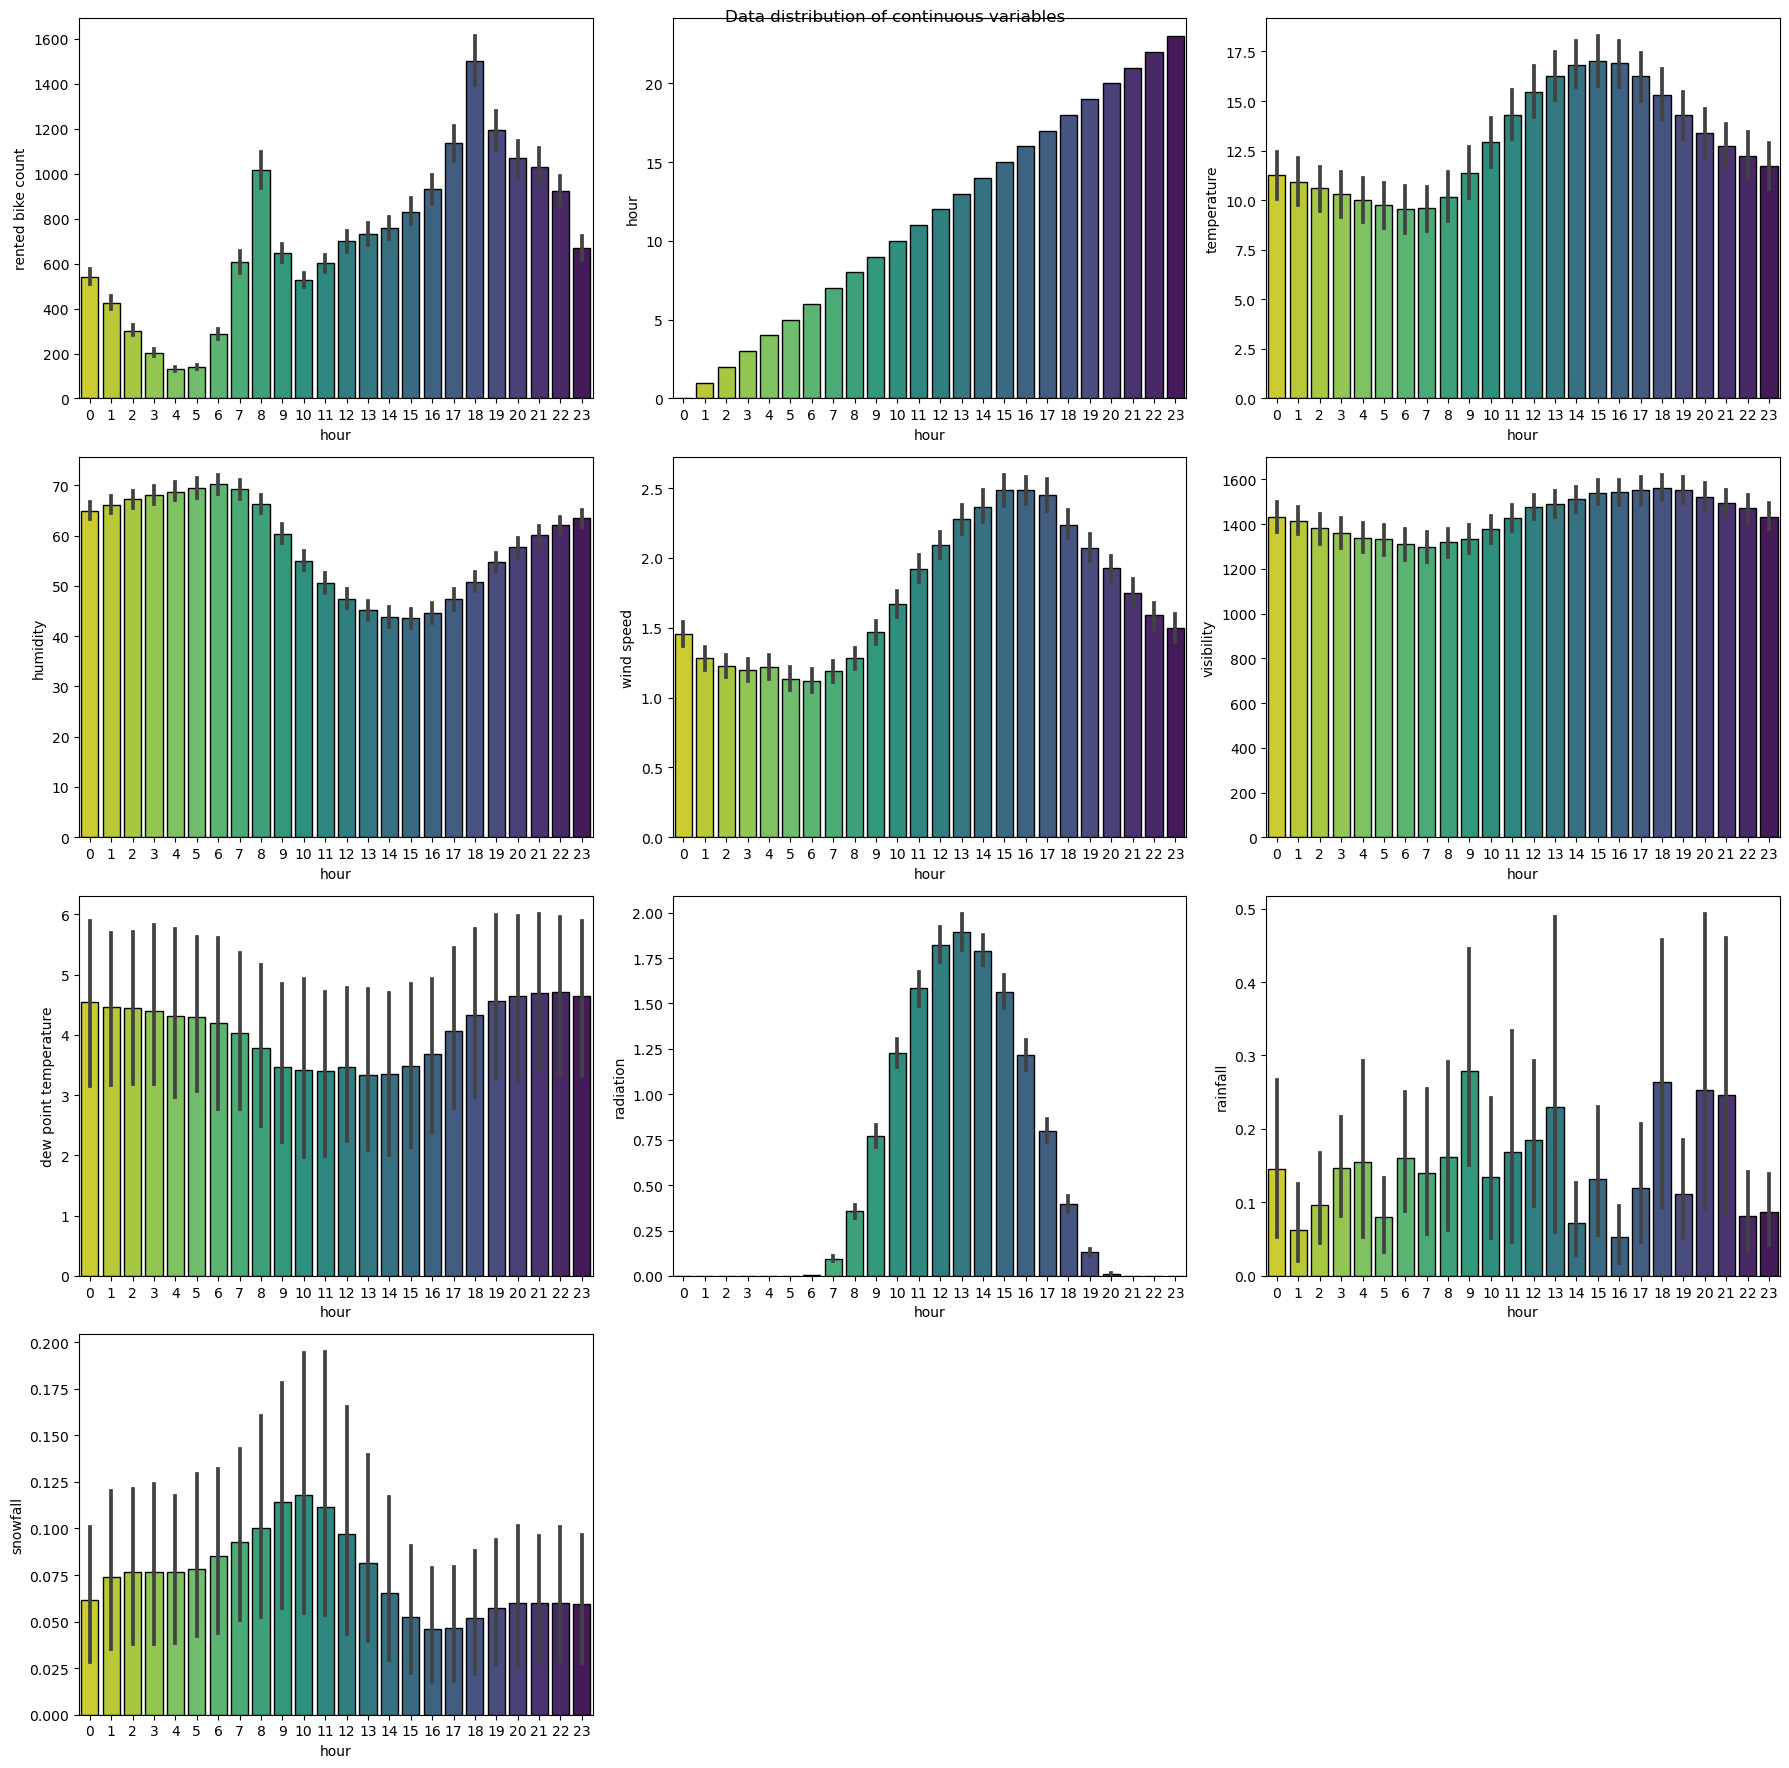

In [20]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64','int']).columns):
#     plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(4,3, i+1)
    sns.barplot(data=df,x='hour', y=col, ax=ax,edgecolor="black",palette='viridis_r')
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

In [21]:
## now we check the data distribution of each Continuous variable

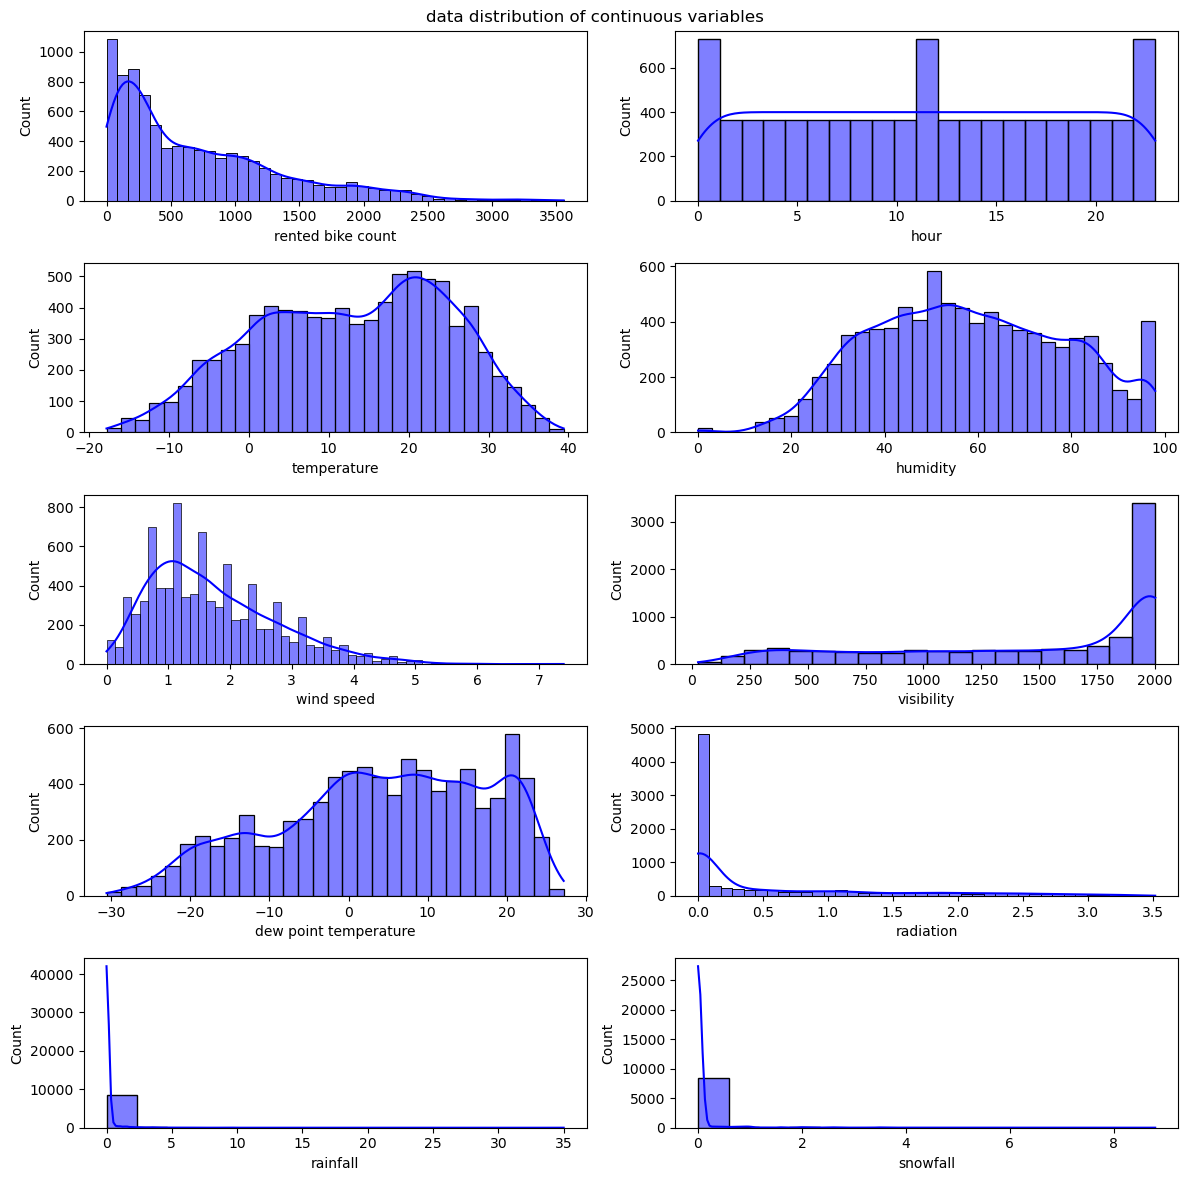

In [24]:
plt.figure(figsize= (12,12))
for i,col in enumerate(df.select_dtypes(include = ['float64','int64']).columns):
    ax = plt.subplot(5,2, i+1)
    sns.histplot(data = df, x = col, ax = ax, color = 'blue', kde = True)
plt.suptitle('data distribution of continuous variables')
plt.tight_layout()

In [25]:
## from the above graph we can see that there are a lot of
## attributes which are positively or negatively distrbuted.

In [26]:
## Box Plot-

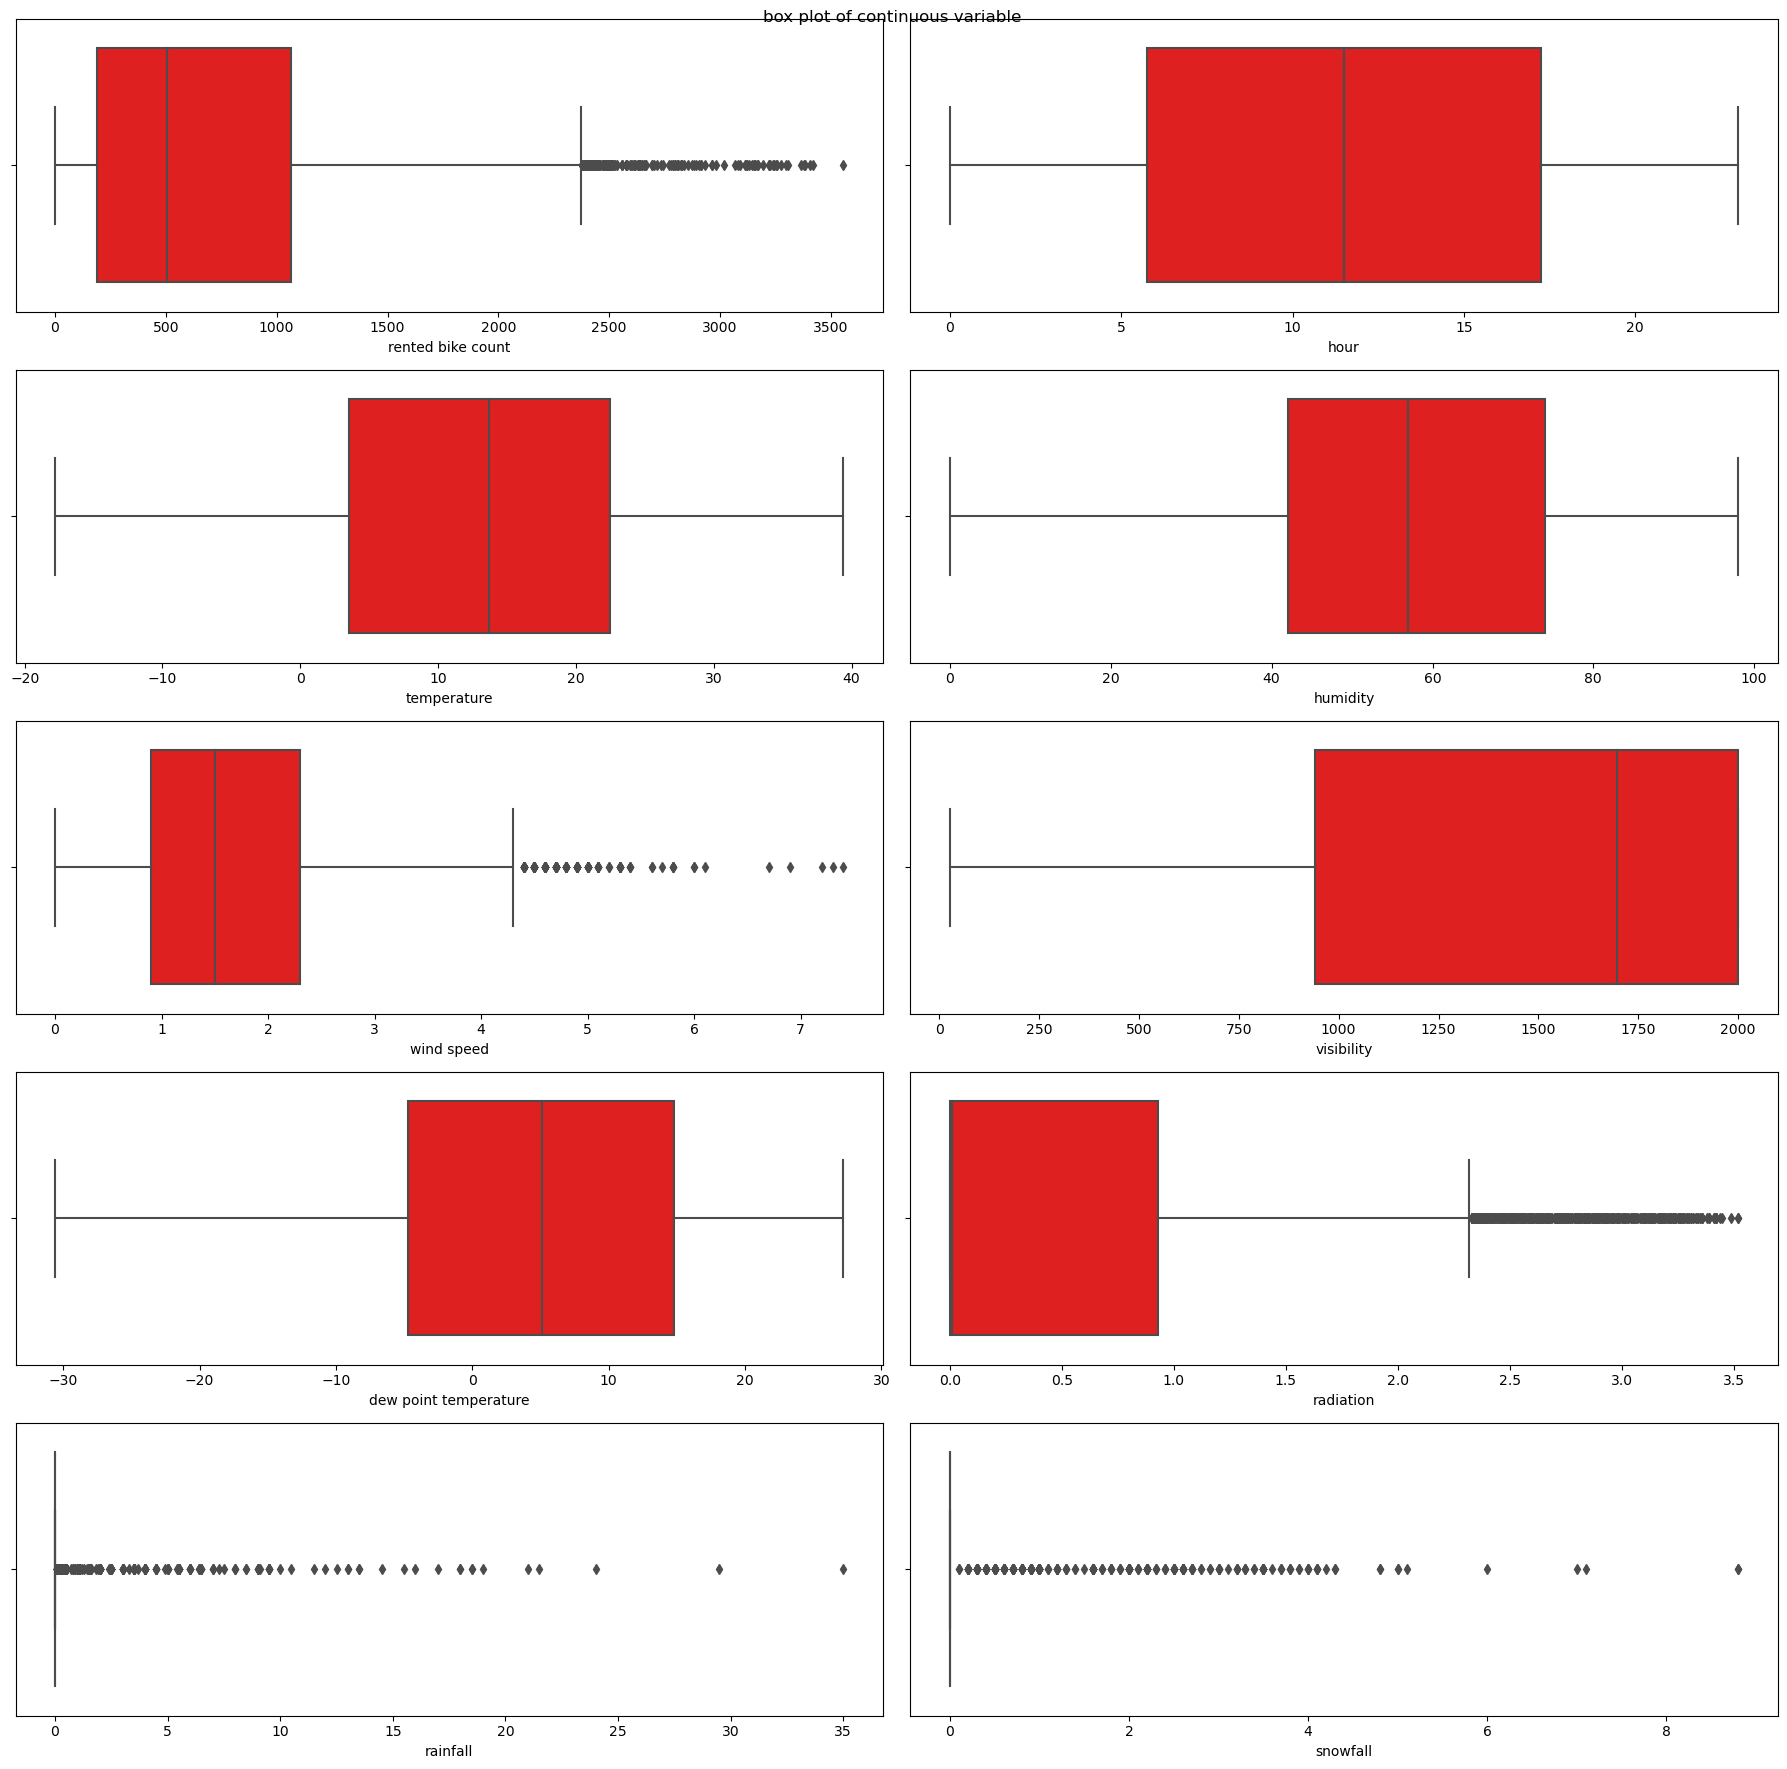

In [29]:
plt.figure(figsize = (18,18))
for i, col in enumerate(df.select_dtypes(include = ['float64','int64']).columns):
    ax = plt.subplot(5,2, i+1)
    sns.boxplot(data = df, x = col, ax = ax, color = 'red')
plt.suptitle('box plot of continuous variable')
plt.tight_layout()